In [1]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 52kB/s 


In [2]:
! pip install keras

In [3]:
! pip install pandas

In [4]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [101]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [7]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
file="/content/drive/My Drive/Colab Notebooks/sonar.all-data.csv"


In [12]:
import pandas as pd
df=pd.read_csv(file)
df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0

In [13]:
df.shape

(207, 61)

In [14]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [15]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [16]:
df.nunique()

0.0200    176
0.0371    181
0.0428    189
0.0207    180
0.0954    192
         ... 
0.0180    120
0.0084    124
0.0090    118
0.0032    109
R           2
Length: 61, dtype: int64

In [17]:
df.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

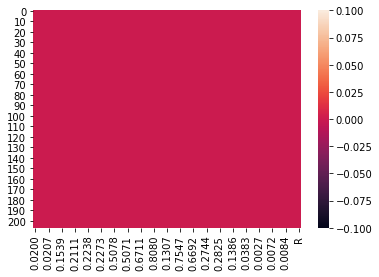

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


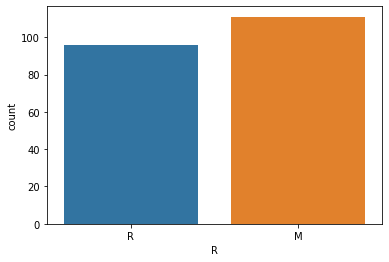

In [19]:
sns.countplot('R', data=df)
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
df1=df.select_dtypes(include='object')
df1.columns

Index(['R'], dtype='object')

In [22]:
cols=['R',]
for i in cols:
  df[i]=encoder.fit_transform(df[i])

In [23]:
df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0

In [24]:
df.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R           int64
Length: 61, dtype: object

In [60]:
X = df.drop('R',axis=1)
y = df['R']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [61]:
X_train.shape

(155, 60)

In [62]:
X_test.shape

(52, 60)

In [63]:
len(X_train.columns)

60

In [64]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [65]:
model = Sequential([
    Dense(60, input_dim=60, activation='relu'),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

r=model.fit(X_train, y_train, epochs=100, batch_size=8,validation_data=(X_test,y_test))

Epoch 1/100
20/20 [==============================] - 0s 12ms/step - loss: 0.6594 - accuracy: 0.5419 - val_loss: 0.6747 - val_accuracy: 0.5577
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5304 - accuracy: 0.7355 - val_loss: 0.6288 - val_accuracy: 0.6731
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4388 - accuracy: 0.8065 - val_loss: 0.5744 - val_accuracy: 0.7308
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3660 - accuracy: 0.8258 - val_loss: 0.5388 - val_accuracy: 0.7885
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.8710 - val_loss: 0.5076 - val_accuracy: 0.7308
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.9161 - val_loss: 0.4721 - val_accuracy: 0.7692
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2063 - accuracy: 0.9419 - val_loss: 0.4459 - val_accuracy: 0.7692
Epoch 8/100


In [66]:
k=r.history['val_accuracy']
print('The Validation Accuracy of ANN Model: ', np.mean(k))

The Validation Accuracy of ANN Model:  0.7796154069900513


In [67]:
yp= model.predict(X_test)
yp

array([[4.2396256e-05],
       [1.1917414e-06],
       [1.2431721e-01],
       [1.1735175e-05],
       [9.9999642e-01],
       [3.7734766e-02],
       [9.7431380e-01],
       [7.1329013e-03],
       [1.6942182e-05],
       [9.9999964e-01],
       [9.9999976e-01],
       [7.4547166e-01],
       [3.9155159e-07],
       [3.0209408e-03],
       [8.4628797e-01],
       [2.1607457e-01],
       [9.9996710e-01],
       [3.2571679e-06],
       [9.9996269e-01],
       [1.0000000e+00],
       [1.3117836e-05],
       [9.9050295e-01],
       [9.9762362e-01],
       [5.6166137e-03],
       [1.8999893e-02],
       [5.0709298e-04],
       [9.9999762e-01],
       [9.9158692e-01],
       [9.9997091e-01],
       [8.5760356e-04],
       [7.8161967e-01],
       [3.4307643e-10],
       [9.8818946e-01],
       [7.0875430e-01],
       [1.0000000e+00],
       [9.4706547e-01],
       [9.9999988e-01],
       [2.7846473e-03],
       [1.0000000e+00],
       [6.2896025e-01],
       [9.1880793e-03],
       [1.156084

In [68]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [69]:
y_pred

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0]

In [70]:
y_pred_labels=np.unique(y_pred, return_counts=True)
y_pred_labels

(array([0, 1]), array([26, 26]))

In [71]:
y_test_labels=np.unique(y_test, return_counts=True)
y_test_labels

(array([0, 1]), array([27, 25]))

In [72]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_pred)
c_m

array([[21,  6],
       [ 5, 20]])

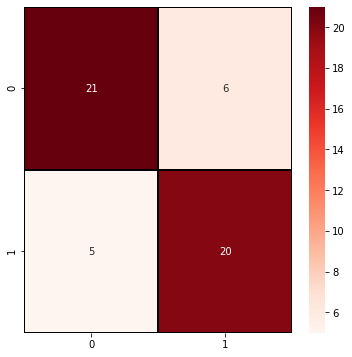

In [73]:

import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' )

In [74]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7884615384615384

In [85]:
X_test[0]

0.0200    0.0453
0.0371    0.0523
0.0428    0.0843
0.0207    0.0689
0.0954    0.1183
           ...  
0.0180    0.0140
0.0084    0.0049
0.0090    0.0052
0.0032    0.0044
R         1.0000
Name: 0, Length: 61, dtype: float64

In [88]:
y_test

186    0
155    0
165    0
200    0
58     1
34     1
151    0
18     1
202    0
62     1
4      1
47     1
110    0
205    0
105    0
172    0
31     1
198    0
33     1
40     1
175    0
59     1
29     1
11     1
124    0
147    0
35     1
44     1
51     1
171    0
153    0
183    0
28     1
16     1
94     1
78     1
38     1
27     1
69     1
119    0
206    0
191    0
73     1
166    0
138    0
199    0
84     1
90     1
123    0
169    0
107    0
201    0
Name: R, dtype: int64

In [87]:
y_test.iloc[0]

0

In [79]:
b=model.predict([[ 0.22659173, -0.33134402, -0.90270496,  0.05929915, -0.0040236 ,
       -0.65377934, -0.4483738 ,  0.12720498,  0.30164042,  0.31273456,
        0.41339104,  0.2829758 , -0.08513533,  0.07226079, -0.25874729,
       -0.58511607, -0.82456764, -0.95714472, -0.82194139, -0.86294313,
       -0.93892818, -1.04772013, -0.82699068, -0.74520161, -0.74466733,
       -0.20847893,  0.58757087,  1.10404523,  1.49340132,  1.16427283,
        0.13678826,  0.07919875,  0.3913261 , -0.11145355, -0.81705092,
       -0.89715341, -0.68284265, -0.79799296, -1.15792629, -0.56436628,
        0.38107681,  0.87596186,  0.97605593, -0.13478673, -0.06463676,
        0.31266874,  0.57212182,  0.78144813,  1.12327414,  0.04083205,
       -0.13351216, -0.34637659, -1.20282045, -1.27198915, -0.55340396,
        0.15085776, -1.18554769,  0.01045561,  0.38995517, -0.27532979]])
b

array([[4.239626e-05]], dtype=float32)

In [80]:
if(b>0.5):
  print('R')
else:
  print('M')

M


In [81]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.77      0.80      0.78        25

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



In [102]:
modeld = Sequential([
    Dense(60, input_dim=60, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

r1=modeld.fit(X_train, y_train, epochs=100, batch_size=8,validation_data=(X_test,y_test))

Epoch 1/100
20/20 [==============================] - 0s 12ms/step - loss: 0.8112 - accuracy: 0.4968 - val_loss: 0.6761 - val_accuracy: 0.5192
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8440 - accuracy: 0.4774 - val_loss: 0.6639 - val_accuracy: 0.5385
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7586 - accuracy: 0.5484 - val_loss: 0.6523 - val_accuracy: 0.6346
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7346 - accuracy: 0.4903 - val_loss: 0.6462 - val_accuracy: 0.6923
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6981 - accuracy: 0.5484 - val_loss: 0.6470 - val_accuracy: 0.6923
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7830 - accuracy: 0.4839 - val_loss: 0.6466 - val_accuracy: 0.7115
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6758 - accuracy: 0.5677 - val_loss: 0.6423 - val_accuracy: 0.7115
Epoch 8/100


In [107]:
y_pred1 = modeld.predict(X_test)

In [108]:
k1=r1.history['val_accuracy']
print('The Validation Accuracy of ANN Model: ', np.mean(k1))

The Validation Accuracy of ANN Model:  0.8221153897047043


In [110]:
y_pred11 = []
for element in y_pred1:
    if element > 0.5:
        y_pred11.append(1)
    else:
        y_pred11.append(0)

In [111]:
y_pred11

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0]

In [112]:
y_pred_labels1=np.unique(y_pred11, return_counts=True)
y_pred_labels1

(array([0, 1]), array([29, 23]))

In [113]:
y_test_labels=np.unique(y_test, return_counts=True)
y_test_labels

(array([0, 1]), array([27, 25]))

In [115]:
from sklearn.metrics import confusion_matrix
c_m1 = confusion_matrix(y_test, y_pred11)
c_m1

array([[24,  3],
       [ 5, 20]])

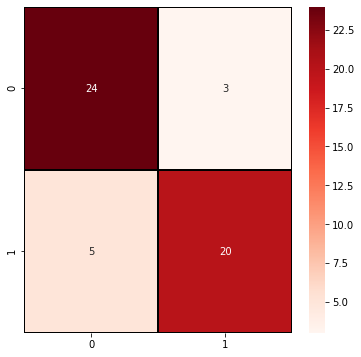

In [116]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m1,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' )

In [117]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred11))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.87      0.80      0.83        25

    accuracy                           0.85        52
   macro avg       0.85      0.84      0.85        52
weighted avg       0.85      0.85      0.85        52

